# K - Means Clustering Assignment

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing dataset

In [2]:
import os

os.chdir('C:/Users/JYOTHSNA/OneDrive/BTech/Externship/Datasets')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


    - From the above data, 
    
        Annual Income is approximately same to all the persons of different age groups.
        
        But, Spending Score is varying in a large amount.

In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


     - Here also, Spending Score has a huge difference in the rows, when compared to other columns

### Checking for Null Values

In [6]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**No Null Values in the dataset**

### Data Visualization

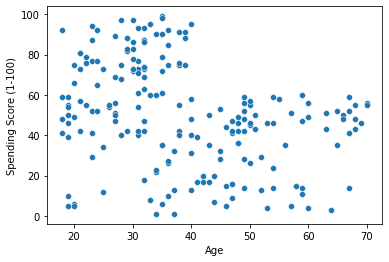

In [7]:
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'], data = df)

        - From the above plot, we can say that

            People between 20 to 30 age group, have high Spending Score.

            People between 35 to 70 age group, have low or moderate Spending Score.

        - That is, 

            Younger people spend more, whereas Elders spend in a moderate way.

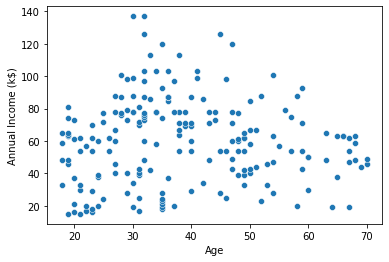

In [8]:
sns.scatterplot(x = df['Age'], y = df['Annual Income (k$)'], data = df)

    - From the above plot, we can say that
    
        People between 20 to 30 age group, have Annual Income of 80k
        
        People of age group 30 to 40 have, high Annual Income.

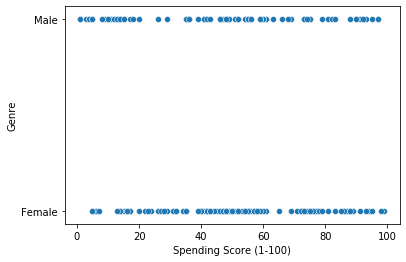

In [9]:
sns.scatterplot(y = df['Genre'], x = df['Spending Score (1-100)'], data = df)

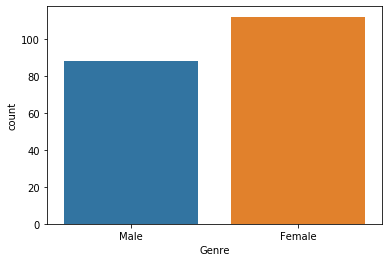

In [10]:
sns.countplot(x = df['Genre'], data = df)

        - According to the dataset, 
        
                    Count of the Female is greater than count of the Male

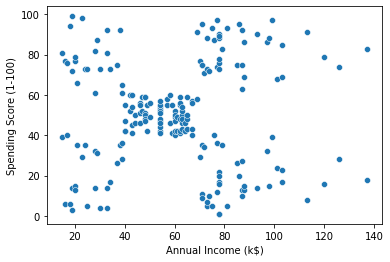

In [11]:
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], data = df)

        - We can see that
        
                More dots are at 40 - 60 Annual Income with Spending Score 40 - 60.

### Feature Selection

    - Considering Gender, Age, Annual Income. We have to interpret the Spending Score.

In [12]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
x = x.values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

### Build the Model

In [15]:
# importing
from sklearn.cluster import KMeans

# Variance
wcss = []

# To get the best k value
# Consider k = 11

for i in range(1, 11):
    # object
    kmeans_model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    
    # training the model
    kmeans_model.fit(x)
    
    # variance
    wcss.append(kmeans_model.inertia_)

C:\Users\JYOTHSNA\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


### Plot Graph between Clusters and Variance

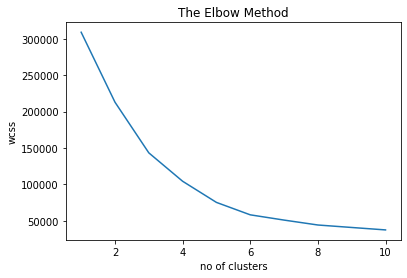

In [16]:
# plotting the Graph

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\JYOTHSNA\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


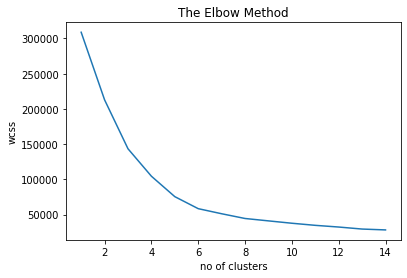

In [17]:
# Let's increase k to 15 and check

wcss = []

for i in range(1, 15):
    # object
    kmeans_model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    
    # training the model
    kmeans_model.fit(x)
    
    # variance
    wcss.append(kmeans_model.inertia_)
    

# plotting the graph

plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

        - By the above plot, we consider k = 5 or 6.
        
        - Let's take k = 5

### Predict

In [18]:
# clusters = 5
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)

# Predicting
y_kmeans = kmeansmodel.fit_predict(x)

In [19]:
x[y_kmeans == 0, 1]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

### Plot the Graph

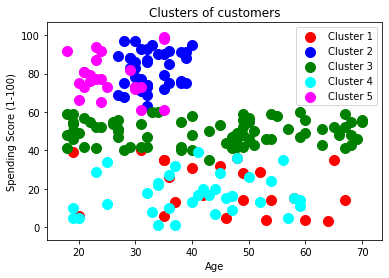

In [20]:
# using scatter plot to visualize the output

# Each 5 clusters are given labels and different colors

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')

# Centroids
# points in yellow color are centroids
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Tilte of the Plot
plt.title('Clusters of customers')

# X-axis label
plt.xlabel('Age')

# Y-axis label
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

**Cluster 1 (Red Color) - Elders spend low score**

**cluster 2 (Blue Color) - spend high score are age group 25 to 40**

**cluster 3 (Green Color) - all age groups spend moderately**

**cluster 4 (cyan Color) - earning less but spending more**

**Cluster 5 (magenta Color) - Elders spend low score**

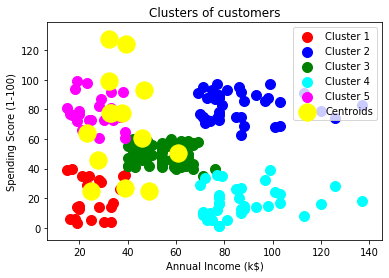

In [21]:
# using scatter plot to visualize the output

# Each 5 clusters are given labels and different colors

plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 1], x[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 1], x[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')

# Centroids
# points in yellow color are centroids
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Tilte of the Plot
plt.title('Clusters of customers')

# X-axis label
plt.xlabel('Annual Income (k$)')

# Y-axis label
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

**Cluster 1 (Red Color) - earning high but spending less**

**cluster 2 (Blue Color) - average in terms of earning and spending**

**cluster 3 (Green Color) - earning high and also spending high**

**cluster 4 (cyan Color) - earning less but spending more**

**Cluster 5 (magenta Color) - Earning less , spending less**

### Clusters

In [22]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:
data['Clusters'] = y_kmeans

C:\Users\JYOTHSNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [25]:
data.tail()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3
199,30,137,83,1


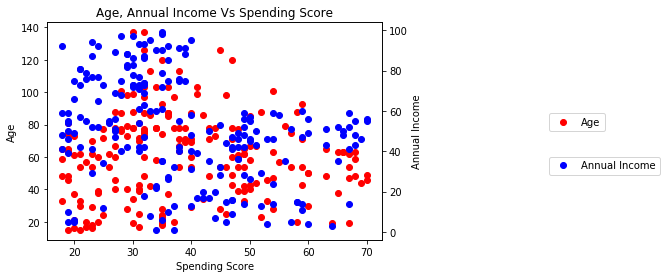

In [26]:
x = data['Age']

y1 = data['Annual Income (k$)']
y2 = data['Spending Score (1-100)']

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()

curve1 = ax1.plot(x, y1, ls = "none", marker = "o", color = "red")

curve2 = ax2.plot(x, y2, ls = "none", marker = "o", color = "blue")

ax1.set_ylabel("Age")
ax2.set_ylabel("Annual Income")

ax1.set_xlabel("Spending Score")

ax1.set_title("Age, Annual Income Vs Spending Score")

ax1.legend(['Age'], loc = (1.5, 0.5))
ax2.legend(['Annual Income'], loc = (1.5, 0.3))

plt.plot()
plt.show()